# 🚀 YOLOv8: The Cutting-Edge Model for Object Detection, Image Classification, and Instance Segmentation

YOLOv8 is the newest state-of-the-art YOLO model that excels in various computer vision tasks such as object detection, image classification, and instance segmentation. This latest iteration brings a plethora of architectural enhancements and developer-friendly features, making it a top choice for both researchers and practitioners.

## 🌟 Why Should You Use YOLOv8?
* 🎯 **High Accuracy**: Achieves outstanding accuracy rates, as evidenced by benchmarks on COCO and Roboflow 100 datasets.
* 💻 **Developer-Friendly**: Packed with features designed for convenience, from an intuitive CLI to a well-organized Python package, making it easier to integrate and utilize in your projects.

## 🔍 Improvements Over Previous YOLO Models

### ⚙️ Architectural Enhancements
1. **Enhanced Backbone Network**: YOLOv8 incorporates an improved backbone network that boosts feature extraction capabilities, leading to better performance in identifying and classifying objects.
2. **Advanced Anchor-Free Detection**: Unlike earlier models that relied heavily on anchor boxes, YOLOv8 employs anchor-free detection, simplifying the model and improving its generalization ability.
3. **Improved Post-Processing**: The new non-maximum suppression (NMS) techniques used in YOLOv8 reduce the number of false positives, thereby increasing precision and recall.

### 🛠️ Developer Experience
1. **Intuitive Command-Line Interface (CLI)**: The CLI provided by YOLOv8 is more user-friendly, enabling developers to train, evaluate, and deploy models with simple commands.
2. **Well-Structured Python Package**: YOLOv8's Python package is modular and easy to extend, facilitating seamless integration into various applications.
3. **Extensive Documentation and Tutorials**: Comprehensive resources, including detailed documentation and practical tutorials, help users quickly get up to speed and effectively utilize the model.

### 📊 Performance Metrics
1. **Higher mAP (Mean Average Precision)**: YOLOv8 demonstrates higher mAP scores on standard benchmarks like COCO, indicating better precision and recall.
2. **Faster Inference Time**: Optimizations in the model architecture lead to reduced inference time, making YOLOv8 suitable for real-time applications.
3. **Lower Memory Footprint**: Despite the increased accuracy and speed, YOLOv8 maintains a lower memory footprint, enabling deployment on resource-constrained devices.

# 🛤️ Notebook Roadmap

## 1. [⚙️ Setup and Installation](#1-⚙️-setup-and-installation)
- Instructions to set up the environment.
- Installing necessary libraries including YOLOv8.

## 2. [📝 Model Configuration](#2-📝-model-configuration)
- Overview of YOLOv8 configuration options.
- Setting up the model configuration file (`yolov8.yaml`).

## 3. [🗂️ Data Preparation](#3-🗂️-data-preparation)
- Loading and preprocessing the dataset.
- Splitting the dataset into training, validation, and test sets.

## 4. [🏋️ Training the Model](#4-🏋️-training-the-model)
- Command to start training the YOLOv8 model.
- Monitoring training progress and understanding the output metrics.

## 5. [📊 Evaluating the Model](#5-📊-evaluating-the-model)
- Visualizing performance metrics (e.g., precision, recall, mAP).

## 6. [🔍 Performing Inference](#6-🔍-performing-inference)
- Running inference on test images.

## 7. [📜 Conclusion](#7-📜-conclusion)
- References and further reading.


<a id="1-⚙️-setup-and-installation"></a>
# Setup and Installation

## Install Ultralytics
`ultralytics` module offers a user-friendly API that simplifies the process of training new models, performing inference on images and videos, and exporting models to different formats.

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.4/799.4 kB 20.4 MB/s eta 0:00:0000:01


## Import Helper Libraries

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob
import torch

### Test GPU

In [3]:
# Check GPU is working or not
print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Using torch 2.1.2 (Tesla P100-PCIE-16GB)


### Setup Path Configs

In [4]:
path = '/kaggle/input/fashion-dataset-yolov8/Fashion-Dataset-Yolov8/'
images_path = path + 'JPEGImages/'
annotations_path  = path + 'Annotations_txt/'

<a id="2-📝-model-configuration"></a>
# YoloV8 Configurations

| Model | Filenames | Task | Inference | Validation | Training | Export |
|---|---|---|---|---|---|---|
| YOLOv8 | `yolov8n.pt` `yolov8s.pt` `yolov8m.pt` `yolov8l.pt` `yolov8x.pt` | Detection | ✅ | ✅ | ✅ | ✅ |
| YOLOv8-seg | `yolov8n-seg.pt` `yolov8s-seg.pt` `yolov8m-seg.pt` `yolov8l-seg.pt` `yolov8x-seg.pt` | Instance Segmentation | ✅ | ✅ | ✅ | ✅ |
| YOLOv8-pose | `yolov8n-pose.pt` `yolov8s-pose.pt` `yolov8m-pose.pt` `yolov8l-pose.pt` `yolov8x-pose-p6.pt` | Pose/Keypoints | ✅ | ✅ | ✅ | ✅ |
| YOLOv8-obb | `yolov8n-obb.pt` `yolov8s-obb.pt` `yolov8m-obb.pt` `yolov8l-obb.pt` `yolov8x-obb.pt` | Oriented Detection | ✅ | ✅ | ✅ | ✅ |
| YOLOv8-cls | `yolov8n-cls.pt` `yolov8s-cls.pt` `yolov8m-cls.pt` `yolov8l-cls.pt` `yolov8x-cls.pt` | Classification | ✅ | ✅ | ✅ | ✅ |

In [5]:
from ultralytics import YOLO
# load pre-trained model
detection_model = YOLO("yolov8l.pt")

100%|██████████| 83.7M/83.7M [00:00<00:00, 319MB/s]


100%|██████████| 151k/151k [00:00<00:00, 7.26MB/s]


image 1/1 /kaggle/working/GRdCC.jpg: 448x640 1 person, 1 bicycle, 4 cars, 3 trucks, 78.4ms
Speed: 10.4ms preprocess, 78.4ms inference, 228.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


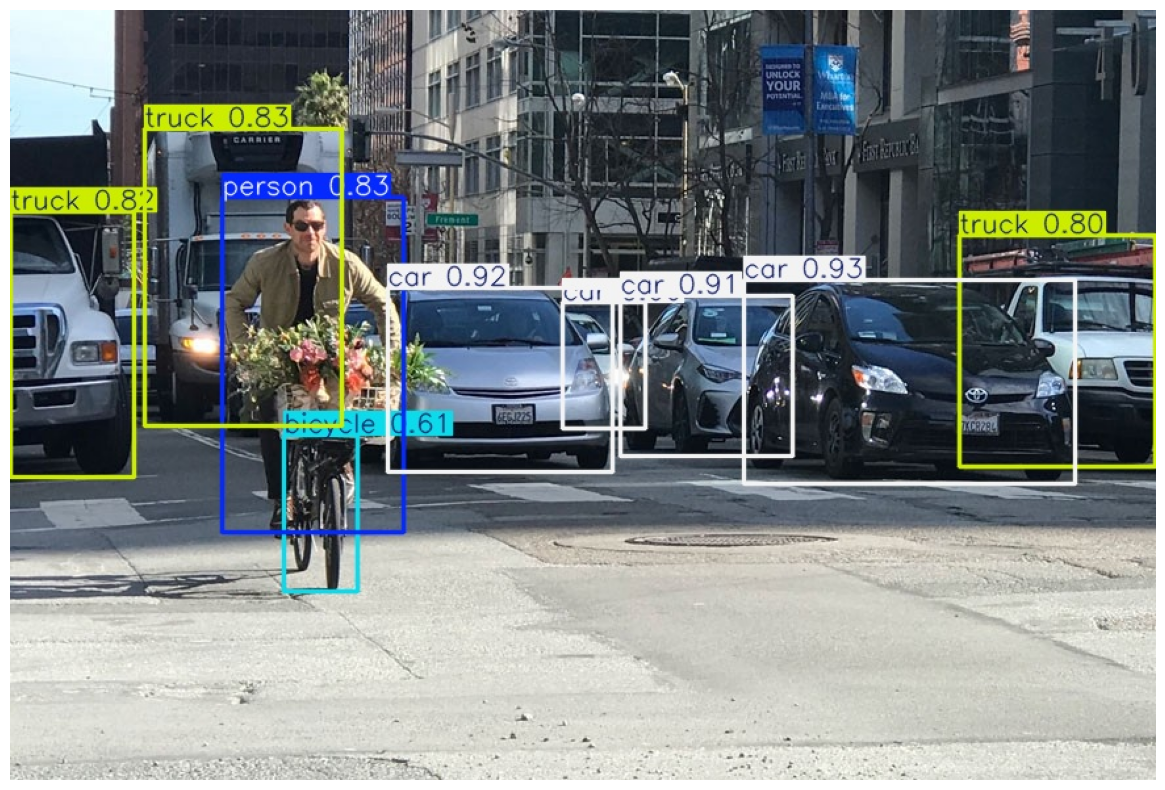

In [6]:
# choose random image
img = random.choice(os.listdir(images_path))
pred=detection_model.predict(source='https://i.stack.imgur.com/GRdCC.jpg', conf=0.5, save=True, line_width=2, show_labels=True)
im = plt.imread('/kaggle/working/runs/detect/predict/GRdCC.jpg')
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(im)

## Plot Training Data with Annotations

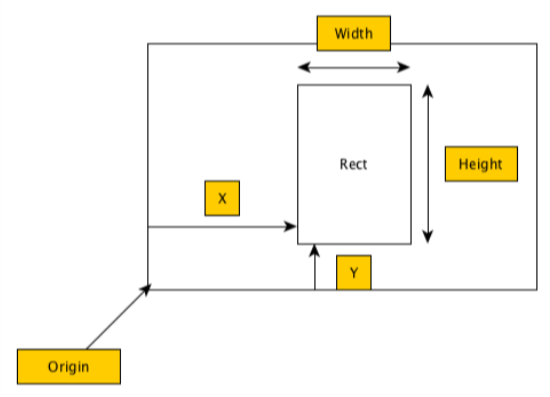

In [7]:
def convert(size, x, y, w, h): #size: (w,h)
    box = np.zeros(4) #np.array([0.,0.,0.,0.])
    dw = 1. / size[0] #size[0]: w
    dh = 1. / size[1] #size[1]: h
    x = x / dw                                          #dw: reciprocal of w   #dh: reciprocal of h
    w = w / dw
    y = y / dh
    h = h / dh
    box[0] = x - (w / 2.0)  # Calculate xmin
    box[1] = x + (w / 2.0)  # Calculate xmax
    box[2] = y - (h / 2.0)  # Calculate ymin
    box[3] = y + (h / 2.0)  # Calculate ymax
    return box

# Function to plot bounding box annotations on an image
def plot_annotations(img, filename):
    # Make a writable copy of the image
    img_copy = img.copy()
    # Open annotations file
    with open(annotations_path + filename, 'r') as f:
        # Read each line (assuming each line contains one annotation)
        for line in f:
            # Split line into values
            value = line.split()
            cls = int(value[0])  # Class label (assuming it's the first value)
            x = float(value[1])  # Center x-coordinate of the bounding box
            y = float(value[2])  # Center y-coordinate of the bounding box
            w = float(value[3])  # Width of the bounding box
            h = float(value[4])  # Height of the bounding box
            
            img_h, img_w = img_copy.shape[:2]  # Get height and width of the image
            bb = convert((img_w, img_h), x, y, w, h)  # Convert bounding box to pixel coordinates
            
            # Draw rectangle on the image using OpenCV
            cv2.rectangle(img_copy, (int(round(bb[0])), int(round(bb[2]))),
                          (int(round(bb[1])), int(round(bb[3]))),
                          (255, 0, 0), 2)  # Draw rectangle with blue color (BGR format), thickness 2
            
    # Display the image with annotations using Matplotlib
    plt.axis('off')  # Turn off axis
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))

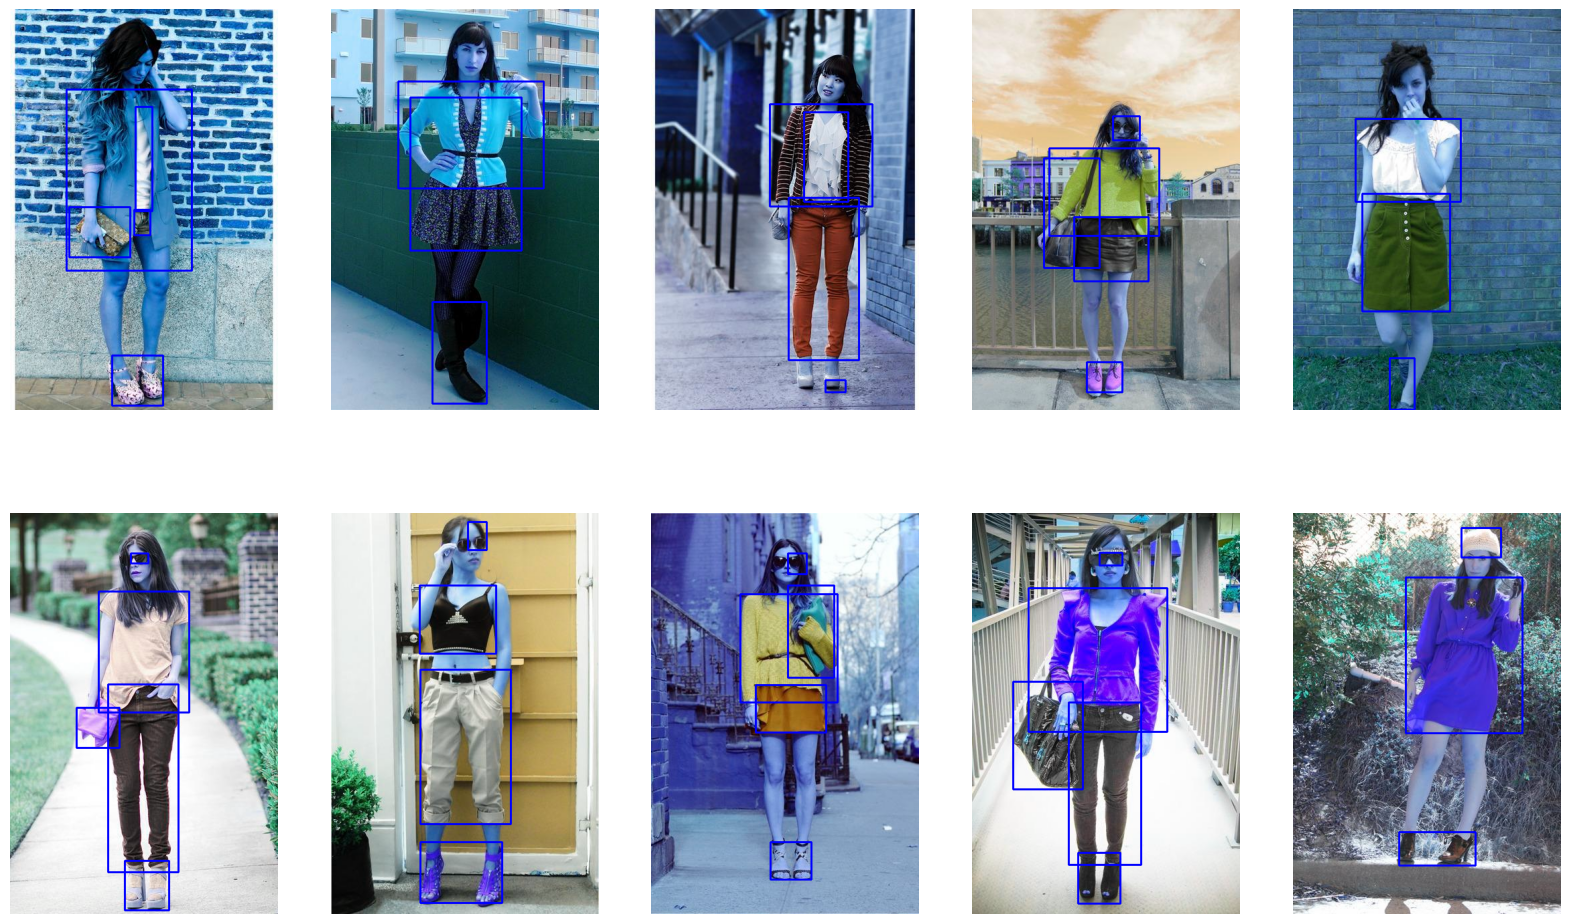

In [8]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.figure(figsize=(20,12))
ls = os.listdir(images_path)
c = 1
for i in random.sample(ls, 10):
    img = plt.imread(images_path+i)
    i = i.rstrip('.jpg') + '.txt'
    plt.subplot(2,5, c)
    plot_annotations(img, i)
    c+=1

<a id="3-🗂️-data-preparation"></a>
# Dataset Preparation

## Splitting Dataset into Train & Test

In [9]:
train = []
with open(path+'ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        train.append(line)

test = []
with open(path+'ImageSets/Main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        test.append(line)

In [10]:
len(train), len(test)

(2145, 537)

## Making Directories, if it doesnt exist.

In [11]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')

## Copying Corresponding Image Data w.r.t To The Label Split

In [12]:
train_path = '/kaggle/working/train/'
test_path = '/kaggle/working/test/'

print('Copying Train Data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(images_path+i+'.jpg', train_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', train_path+'labels/'+i+'.txt')

print('Copying Test Data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(images_path+i+'.jpg', test_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', test_path+'labels/'+i+'.txt')

Copying Train Data..!!


100%|██████████| 2145/2145 [00:18<00:00, 117.43it/s]


Copying Test Data..!!


100%|██████████| 537/537 [00:04<00:00, 124.36it/s]


## Train Custom Model

## Creating .yaml file

In [13]:
text = """
train: /kaggle/working/train
val: /kaggle/working/test

# number of classes
nc: 10

# class names
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(text)

<a id="4-🏋️-training-the-model"></a>
# Training the Model

In [14]:
model = YOLO("yolov8l.pt")
model.train(data='data.yaml', epochs=50)

Ultralytics YOLOv8.2.50 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 755k/755k [00:00<00:00, 22.1MB/s]
2024-07-08 06:28:31,718	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-08 06:28:32,511	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 98.5MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/train/labels... 2145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2145/2145 [00:01<00:00, 1213.51it/s]

train: New cache created: /kaggle/working/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/test/labels... 537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 537/537 [00:00<00:00, 1097.53it/s]

val: New cache created: /kaggle/working/test/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.2G      1.284      1.691      1.469          7        640: 100%|██████████| 135/135 [02:06<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]

                   all        537       2035      0.577      0.649      0.635       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.2G      1.296      1.322      1.493         10        640: 100%|██████████| 135/135 [02:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.07it/s]

                   all        537       2035      0.513      0.522      0.475      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.2G      1.351      1.342      1.536         13        640: 100%|██████████| 135/135 [02:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]

                   all        537       2035      0.601      0.586      0.594      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50        11G      1.325      1.276      1.527         14        640: 100%|██████████| 135/135 [02:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.07it/s]

                   all        537       2035      0.608      0.635      0.626      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.2G      1.295      1.222      1.497         17        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]

                   all        537       2035      0.675      0.699      0.707       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.1G      1.263      1.162      1.487         10        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035      0.632      0.698      0.701       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.2G      1.244      1.099      1.472          4        640: 100%|██████████| 135/135 [02:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.748      0.666      0.703      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        11G      1.204      1.052      1.431          8        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035       0.74      0.697      0.741      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.2G      1.205      1.026      1.432         10        640: 100%|██████████| 135/135 [02:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.718      0.701       0.73      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.1G      1.184      1.001      1.424          3        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.694      0.739       0.75      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.2G      1.158     0.9603      1.405         10        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035      0.716      0.702      0.745      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50        11G      1.152     0.9401      1.396         15        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]

                   all        537       2035      0.758       0.71      0.754        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.2G      1.126     0.9156      1.377          8        640: 100%|██████████| 135/135 [02:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035      0.772      0.721      0.761      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.1G      1.092     0.8851      1.362         10        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.755      0.736       0.77      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.1G      1.103     0.8687      1.366          8        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.745       0.72      0.763      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50        11G      1.088     0.8561       1.36         10        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.08it/s]

                   all        537       2035      0.744      0.727      0.768      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.1G      1.072     0.8406      1.353          6        640: 100%|██████████| 135/135 [02:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.08it/s]

                   all        537       2035      0.764      0.749       0.79       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.1G       1.07     0.8138      1.353          2        640: 100%|██████████| 135/135 [02:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.756       0.76      0.796      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.2G      1.053     0.8077      1.336          8        640: 100%|██████████| 135/135 [02:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035       0.72      0.731      0.758      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50        11G      1.043     0.8036      1.326         12        640: 100%|██████████| 135/135 [02:01<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.08it/s]

                   all        537       2035      0.741      0.748      0.779      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.2G      1.039      0.764      1.332          8        640: 100%|██████████| 135/135 [02:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.768      0.744      0.786      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.1G      1.016     0.7579      1.305          5        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.758      0.739      0.774      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.2G      1.008     0.7472      1.303         10        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035      0.751      0.752      0.792      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50        11G     0.9997     0.7314      1.293          3        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]

                   all        537       2035      0.751      0.755      0.788      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.2G      0.987     0.7185      1.277         13        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]

                   all        537       2035      0.746       0.77      0.797      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.1G     0.9802     0.7138      1.292          3        640: 100%|██████████| 135/135 [02:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.761      0.766       0.79      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.1G     0.9727     0.7002      1.284          3        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035      0.785      0.749       0.79       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        11G     0.9638     0.6774      1.271          6        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]

                   all        537       2035      0.781      0.758      0.794      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.2G     0.9483     0.6687      1.259          6        640: 100%|██████████| 135/135 [02:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.761      0.759      0.787      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.1G      0.929     0.6482      1.251          7        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.776      0.755      0.786      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.2G     0.9187     0.6383      1.241          4        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035       0.76      0.757      0.785      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        11G     0.9137     0.6257      1.232          8        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.12it/s]

                   all        537       2035      0.799      0.732      0.785      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.2G     0.9014     0.6042      1.224          5        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035      0.752      0.769      0.798      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.1G     0.8866     0.6021      1.219         13        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035      0.751       0.77      0.792      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.2G     0.8714     0.5807      1.207          4        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035       0.74      0.776      0.791       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50        11G     0.8685      0.574      1.203          5        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]

                   all        537       2035      0.746      0.776      0.783      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.1G     0.8522     0.5627      1.191          7        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.762      0.764      0.786      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.1G     0.8381     0.5495      1.188          3        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035      0.776      0.763      0.786      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.2G     0.8372     0.5438      1.189          4        640: 100%|██████████| 135/135 [02:01<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.756      0.784      0.787      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50        11G     0.8111     0.5336      1.158         16        640: 100%|██████████| 135/135 [02:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035      0.787      0.751      0.777      0.529


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.1G     0.7574     0.4488      1.156          2        640: 100%|██████████| 135/135 [02:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.08it/s]

                   all        537       2035      0.774      0.751       0.78      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.1G     0.7407     0.4254      1.154          1        640: 100%|██████████| 135/135 [02:01<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.758      0.762      0.787      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      11.2G     0.7362     0.4164      1.144          3        640: 100%|██████████| 135/135 [02:01<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.799      0.745      0.785      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50        11G     0.7246     0.4063      1.146          3        640: 100%|██████████| 135/135 [02:01<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]

                   all        537       2035      0.777      0.741      0.773      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      11.2G     0.7057      0.397      1.122          3        640: 100%|██████████| 135/135 [02:01<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035      0.769      0.757      0.772      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.1G     0.6972     0.3834      1.112          3        640: 100%|██████████| 135/135 [02:01<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.08it/s]

                   all        537       2035       0.76      0.764      0.769      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.2G     0.6837      0.375      1.094          4        640: 100%|██████████| 135/135 [02:01<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.07it/s]

                   all        537       2035      0.758      0.765      0.771      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        11G     0.6778      0.367      1.096          2        640: 100%|██████████| 135/135 [02:01<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035      0.746      0.765      0.773      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.1G     0.6604     0.3604      1.085          3        640: 100%|██████████| 135/135 [02:01<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035      0.752      0.775      0.778      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.1G     0.6554     0.3537      1.083          4        640: 100%|██████████| 135/135 [02:01<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]

                   all        537       2035      0.757      0.769      0.779      0.534



50 epochs completed in 1.843 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.50 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 268 layers, 43614318 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.50it/s]


                   all        537       2035      0.756      0.766      0.798      0.547
              sunglass         82         82      0.561      0.329      0.418      0.175
                   hat         77         77      0.826      0.799      0.827      0.481
                jacket        179        181       0.71      0.856      0.858      0.668
                 shirt        361        366      0.801      0.815      0.856       0.62
                 pants        114        114       0.88       0.93      0.954       0.77
                shorts        107        107      0.839      0.766      0.831      0.558
                 skirt        186        186      0.765      0.804      0.829      0.647
                 dress        128        128      0.687      0.859      0.824      0.654
                   bag        274        274      0.696      0.715       0.76      0.433
                  shoe        520        520      0.794      0.786      0.825       0.46
Speed: 0.1ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7caa0c23f940>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

<a id="5-📊-evaluating-the-model"></a>
# Model Evaluation

## Plot Fn.

In [17]:
%matplotlib inline
model_path = 'runs/detect/train/'
def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

## Precision Curve

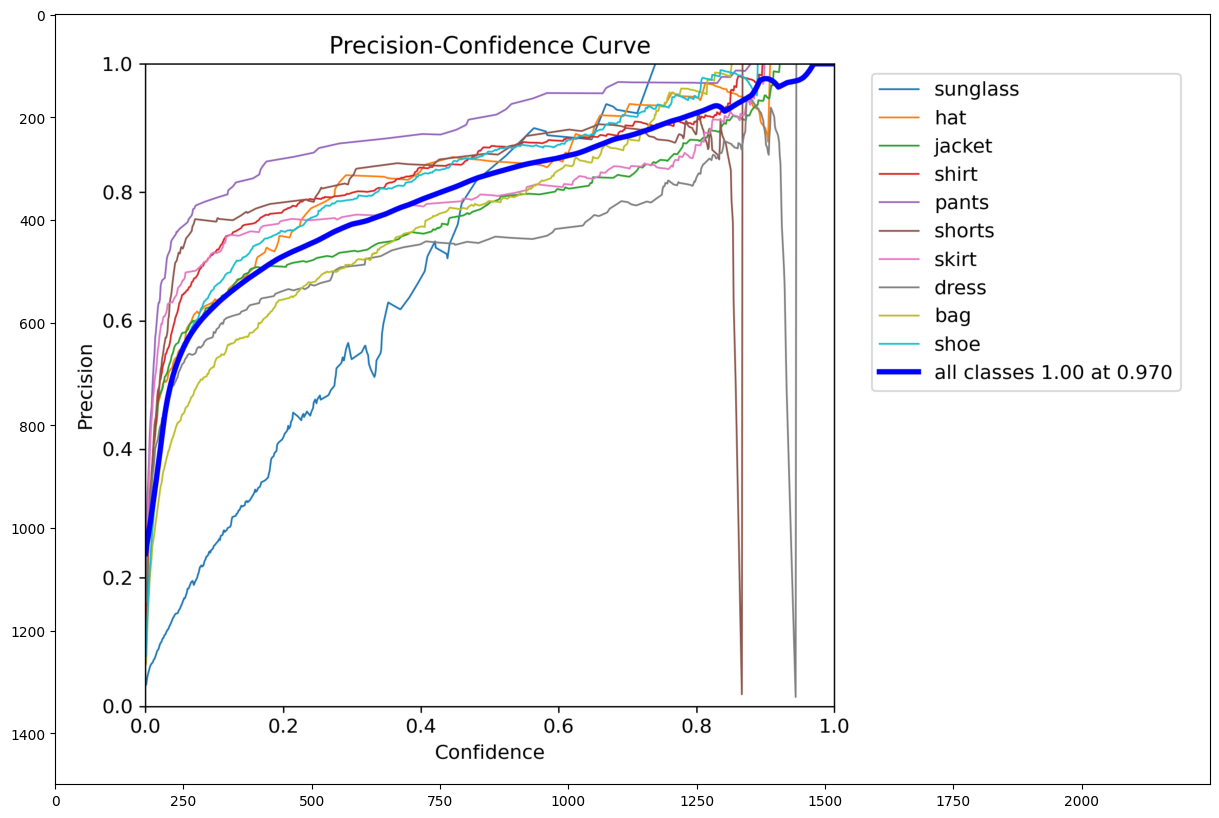

In [18]:
plot(['P_curve.png'],(1,1))

## Recall Curve

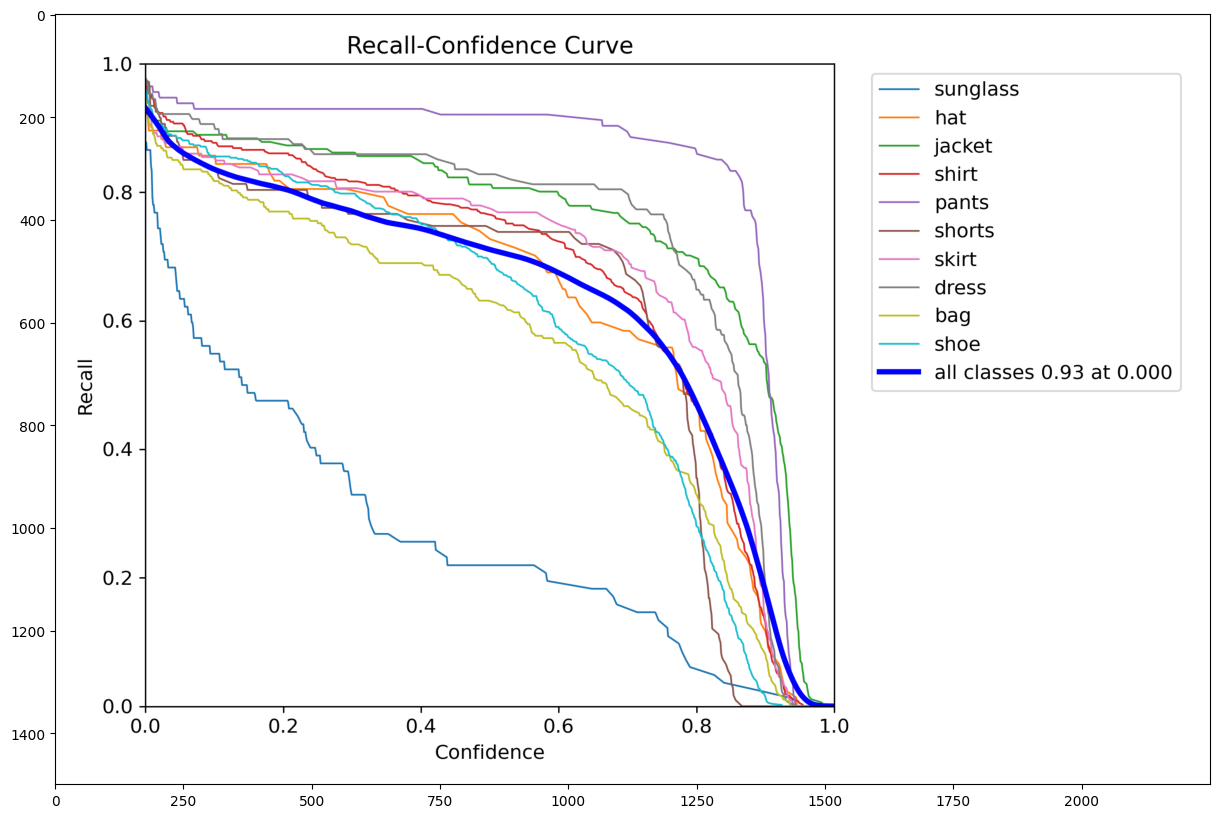

In [19]:
plot(['R_curve.png'],(1,1))

## F1-Confidence Curve

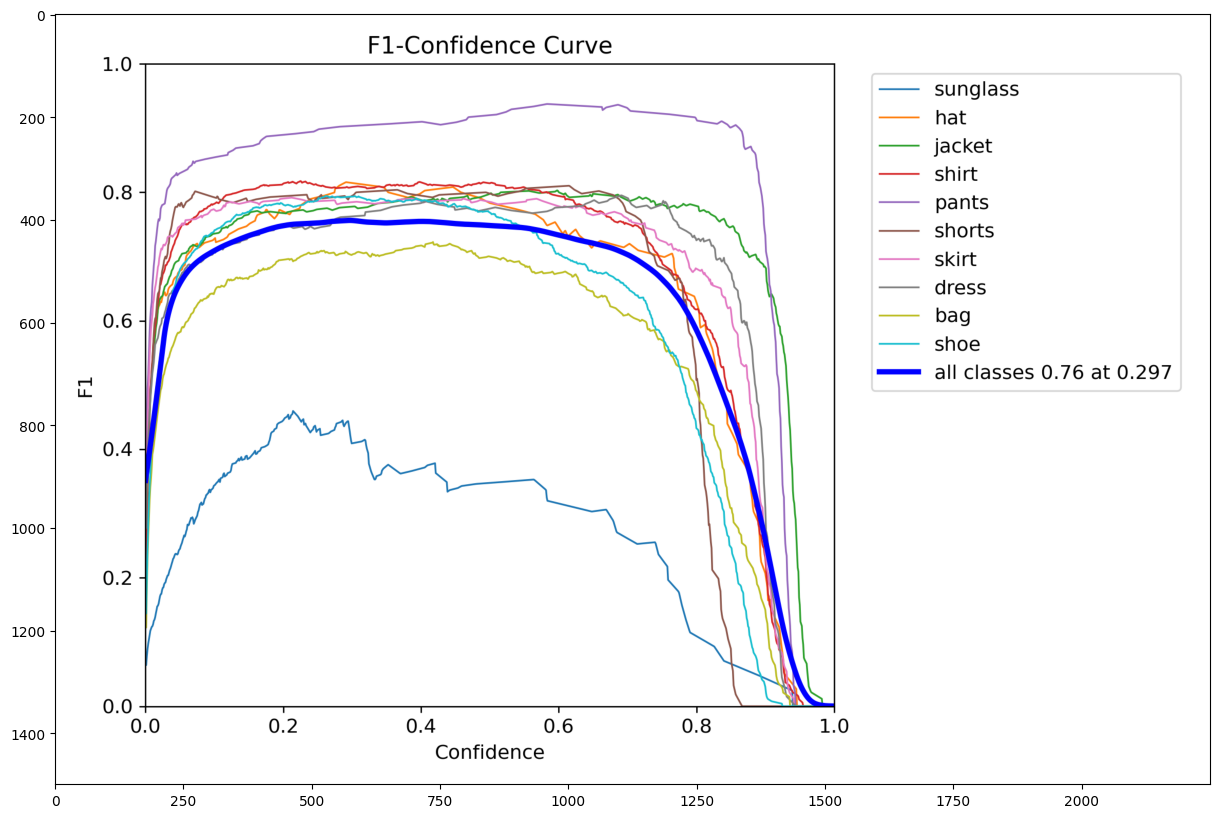

In [20]:
plot(['F1_curve.png'],(1,1))

## Precision-Recall Curve

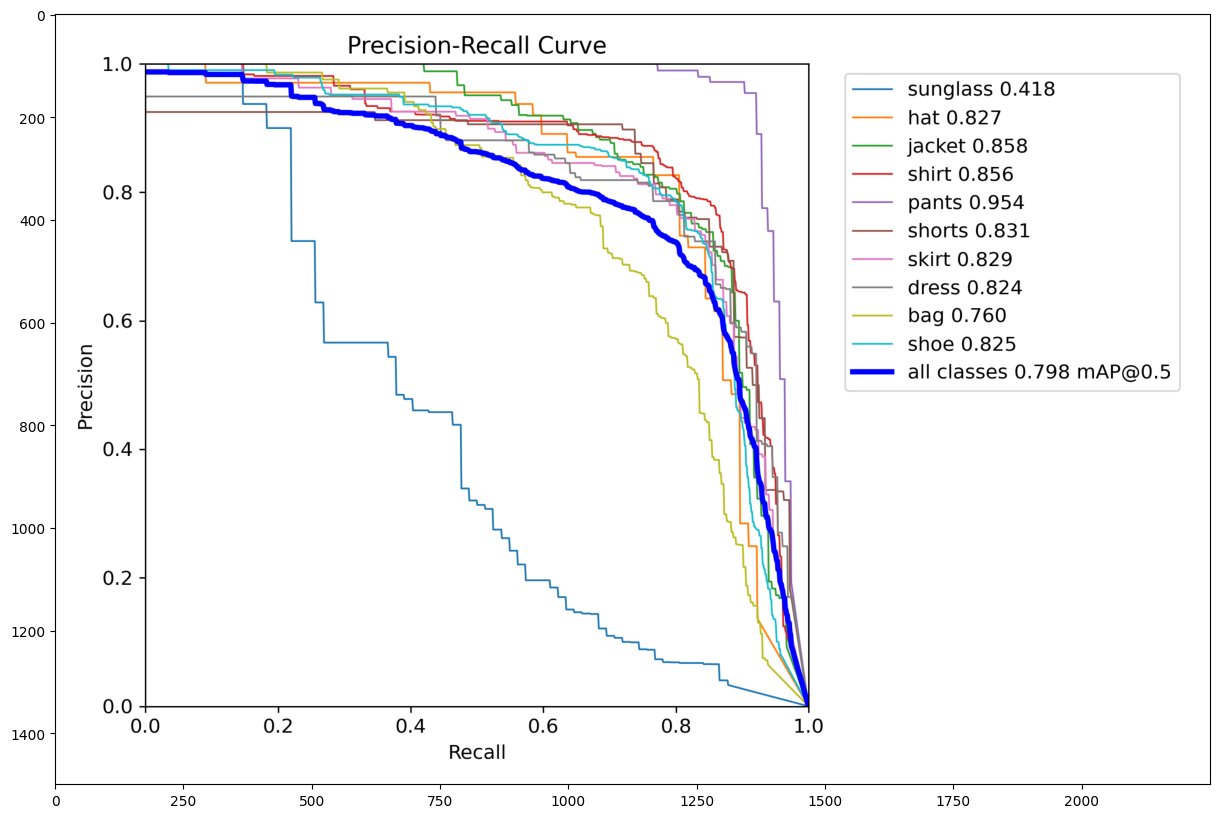

In [21]:
plot(['PR_curve.png'],(1,1))

## Confusion Matrix

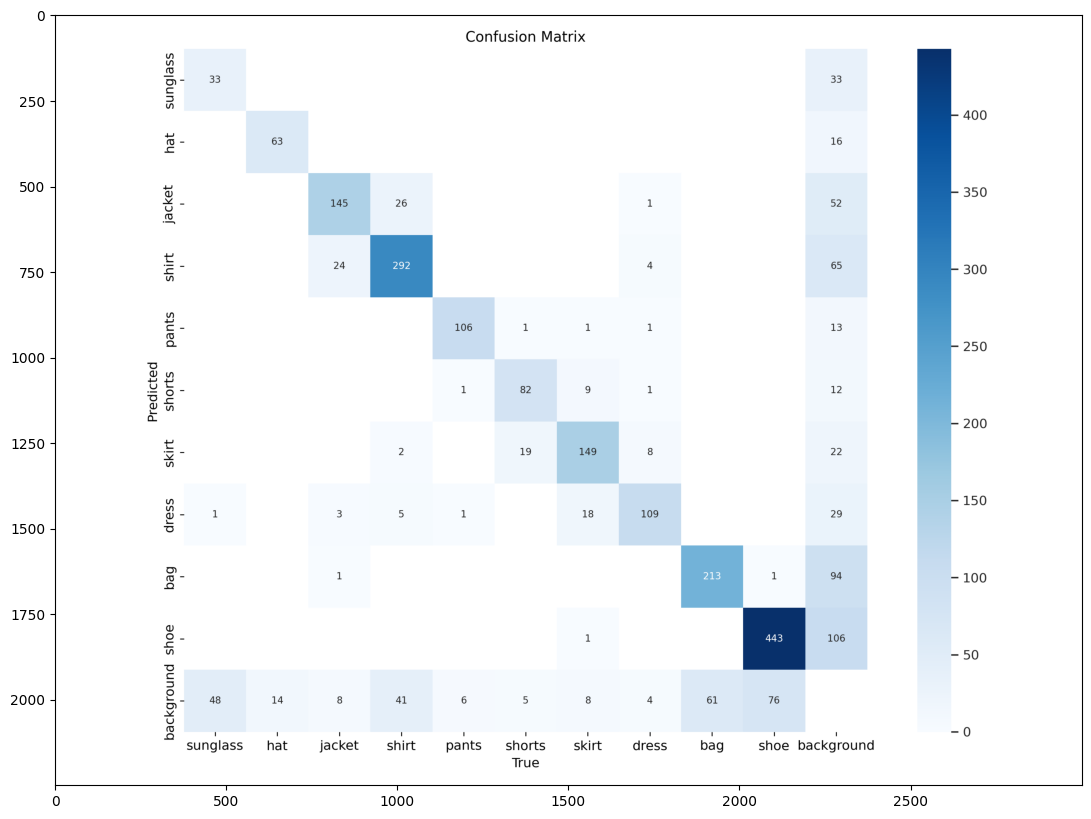

In [22]:
plot(['confusion_matrix.png'],(1,1))

## Labels - Instances

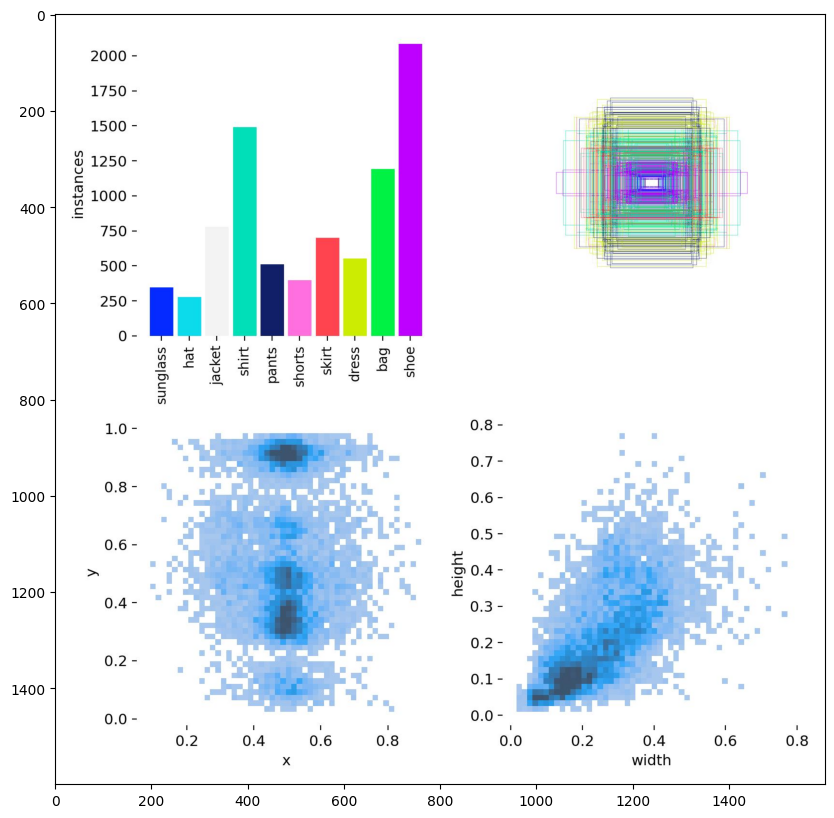

In [23]:
plot(['labels.jpg'],(1,1))

## Results

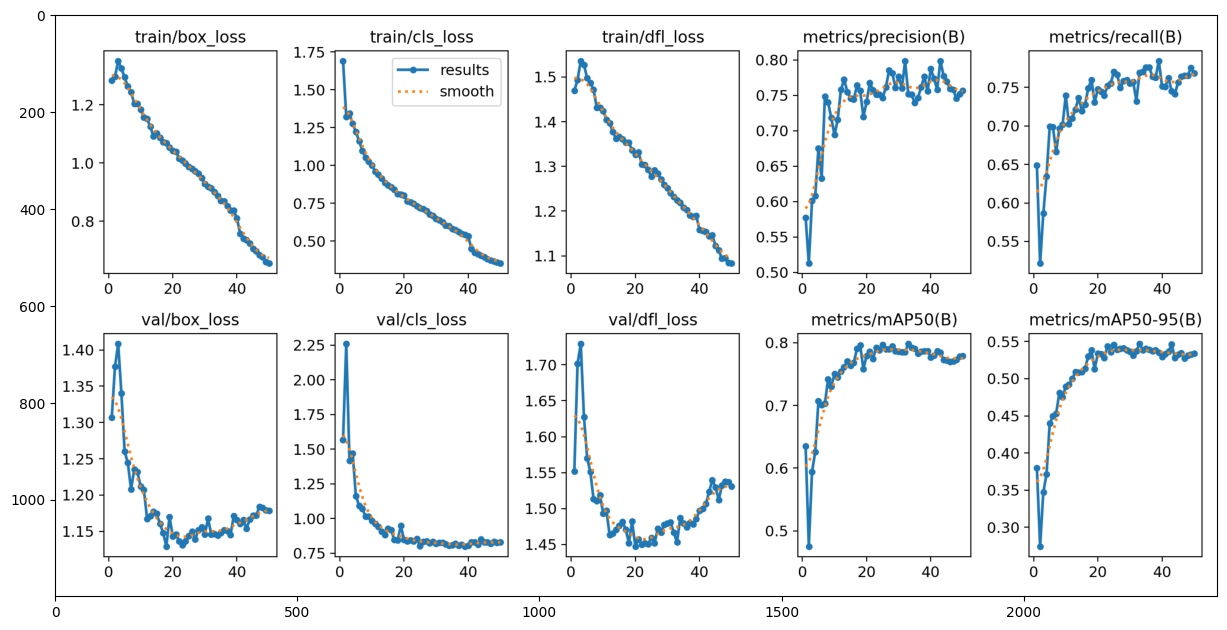

In [24]:
plot(['results.png'],(1,1))

<a id="6-🔍-performing-inference"></a>
# Inference


image 1/1 /kaggle/input/fashion-dataset-yolov8/Fashion-Dataset-Yolov8/JPEGImages/105946.jpg: 640x448 1 shirt, 1 pants, 1 shoe, 20.0ms
Speed: 2.7ms preprocess, 20.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/train17


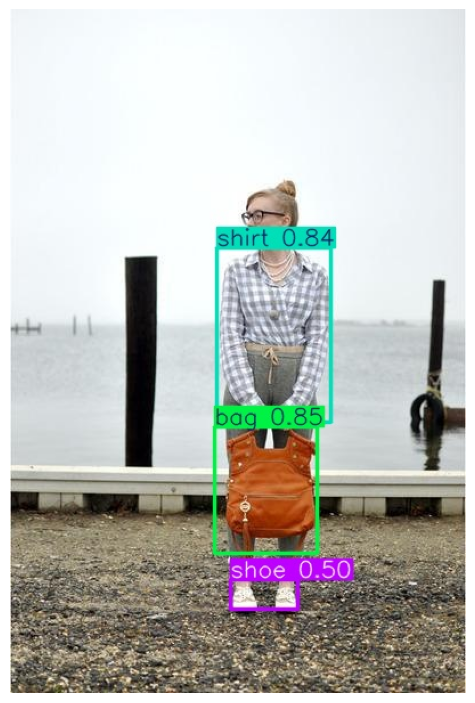

In [30]:
# choose random image from dataset
plt.figure(figsize=(20,20))
imgs = random.sample(os.listdir(images_path), 1)
c=1
for img in imgs:
    i=model.predict(source=images_path+img, conf=0.4, save=True, line_width=2)

    im = plt.imread('/kaggle/working/runs/detect/train9/9267.jpg')
    plt.subplot(2,3,c)
    plt.axis('off')
    plt.imshow(im)
    c+=1

<a id="7-📜-conclusion"></a>
# Conclusion

## If you want to dive deep into Yolov8, or its previous models...

## Official Documentation and Repositories

- **Ultralytics YOLOv8 GitHub Repository**:
  - This is the official repository where you can find the latest code, models, and updates for YOLOv8.
  - [Ultralytics/YOLOv8 GitHub](https://github.com/ultralytics/ultralytics)

- **Ultralytics YOLOv8 Documentation**:
  - The official documentation provides detailed information on how to use YOLOv8, including installation, usage, tutorials, and API references.
  - [Ultralytics YOLOv8 Docs](https://docs.ultralytics.com/)

## Research Papers & Codes

Here are the papers for the YOLO (You Only Look Once) object detection models from YOLOv1 to YOLOv8:

1. **YOLOv1: "You Only Look Once: Unified, Real-Time Object Detection"**:
   - This paper introduces the original YOLO model, which performs object detection in a single pass through the network.
   - [YOLOv1 Paper](https://arxiv.org/abs/1506.02640)

2. **YOLOv2: "YOLO9000: Better, Faster, Stronger"**:
   - YOLOv2 improves upon YOLOv1 with better accuracy and the capability to detect more classes.
   - [YOLOv2 Paper](https://arxiv.org/abs/1612.08242)

3. **YOLOv3: "YOLOv3: An Incremental Improvement"**:
   - YOLOv3 introduces more enhancements, making it even more accurate and efficient.
   - [YOLOv3 Paper](https://arxiv.org/abs/1804.02767)

4. **YOLOv4: "YOLOv4: Optimal Speed and Accuracy of Object Detection"**:
   - This version includes numerous techniques to boost both speed and accuracy.
   - [YOLOv4 Paper](https://arxiv.org/abs/2004.10934)

5. **YOLOv5**:
   - Developed by Ultralytics, YOLOv5 focuses on simplifying the deployment process and further improving performance.
   - [Yolov5 GitHub](https://github.com/ultralytics/yolov5)

6. **YOLOv6**:
   - YOLOv6 aims to deliver even better accuracy and efficiency, suitable for deployment in production environments. 
   - [YOLOv6 GitHub](https://github.com/meituan/YOLOv6)

7. **YOLOv7**:
   - YOLOv7 introduces new techniques to further optimize the model for real-time object detection.
   - [YOLOv7 Paper](https://arxiv.org/abs/2207.02696)


## Community and Forums

- **Ultralytics YOLO Discussions**:
  - The Ultralytics GitHub repository has a Discussions section where you can ask questions and engage with the community.
  - [Ultralytics Discussions](https://github.com/ultralytics/ultralytics/discussions)

- **Reddit Computer Vision Subreddit**:
  - A community where you can discuss YOLO models, ask questions, and find resources shared by other practitioners.
  - [r/computervision](https://www.reddit.com/r/computervision/)
